In [1]:
import pandas as pd
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv(r"C:file.csv")
df

,Company Name,Ticker Symbol,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,MarketCap
0,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2007,1.82,9.8,22.8,74.71,62.36,87.40,63.75,74.71,1.018590e+10
1,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2008,1.96,9.8,28.5,78.14,60.83,86.38,75.37,56.93,5.553723e+09
2,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2009,0.80,3.7,11.2,72.79,77.60,82.29,58.04,61.40,6.105464e+09
3,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2010,2.00,7.3,22.2,75.00,73.20,87.21,59.77,75.00,8.619436e+09
4,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2011,2.95,11.2,27.9,78.09,77.28,89.17,63.89,78.09,9.204053e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4580,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2019,3.13,15.8,77.1,59.13,54.75,65.89,52.25,59.13,6.303821e+10
4581,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2020,3.64,15.7,71.7,64.81,56.85,77.76,50.80,64.81,7.865682e+10
4582,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2021,3.85,14.7,50.0,65.85,64.32,77.45,49.63,65.85,1.154569e+11
4583,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2022,4.70,16.3,53.9,72.22,65.93,78.24,67.85,72.22,6.830285e+10


# Add Market Capitalization category column

In [5]:
# Assuming your DataFrame is named df and the 'MarketCap' column is already present
bins = [0, 3e8, 2e9, 1e10, 2e11, float('inf')]
labels = ['Micro Cap', 'Small Cap', 'Mid Cap', 'Large Cap', 'Mega Cap']

df['Market Capitalization Category'] = pd.cut(df['MarketCap'], bins=bins, labels=labels, right=False)

In [7]:
df

,Company Name,Ticker Symbol,NAICS National Industry Name,Year,EPS,ROA,ROE,ESG_score,Env_score,Soc_score,Gov_score,ESG_Comb_score,MarketCap,Market Capitalization Category
0,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2007,1.82,9.8,22.8,74.71,62.36,87.40,63.75,74.71,1.018590e+10,Large Cap
1,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2008,1.96,9.8,28.5,78.14,60.83,86.38,75.37,56.93,5.553723e+09,Mid Cap
2,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2009,0.80,3.7,11.2,72.79,77.60,82.29,58.04,61.40,6.105464e+09,Mid Cap
3,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2010,2.00,7.3,22.2,75.00,73.20,87.21,59.77,75.00,8.619436e+09,Mid Cap
4,Agilent Technologies Inc,A,Analytical Laboratory Instrument Manufacturing,2011,2.95,11.2,27.9,78.09,77.28,89.17,63.89,78.09,9.204053e+09,Mid Cap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4580,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2019,3.13,15.8,77.1,59.13,54.75,65.89,52.25,59.13,6.303821e+10,Large Cap
4581,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2020,3.64,15.7,71.7,64.81,56.85,77.76,50.80,64.81,7.865682e+10,Large Cap
4582,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2021,3.85,14.7,50.0,65.85,64.32,77.45,49.63,65.85,1.154569e+11,Large Cap
4583,Zoetis Inc,ZTS,Pharmaceutical Preparation Manufacturing,2022,4.70,16.3,53.9,72.22,65.93,78.24,67.85,72.22,6.830285e+10,Large Cap


# Multicolinearity check

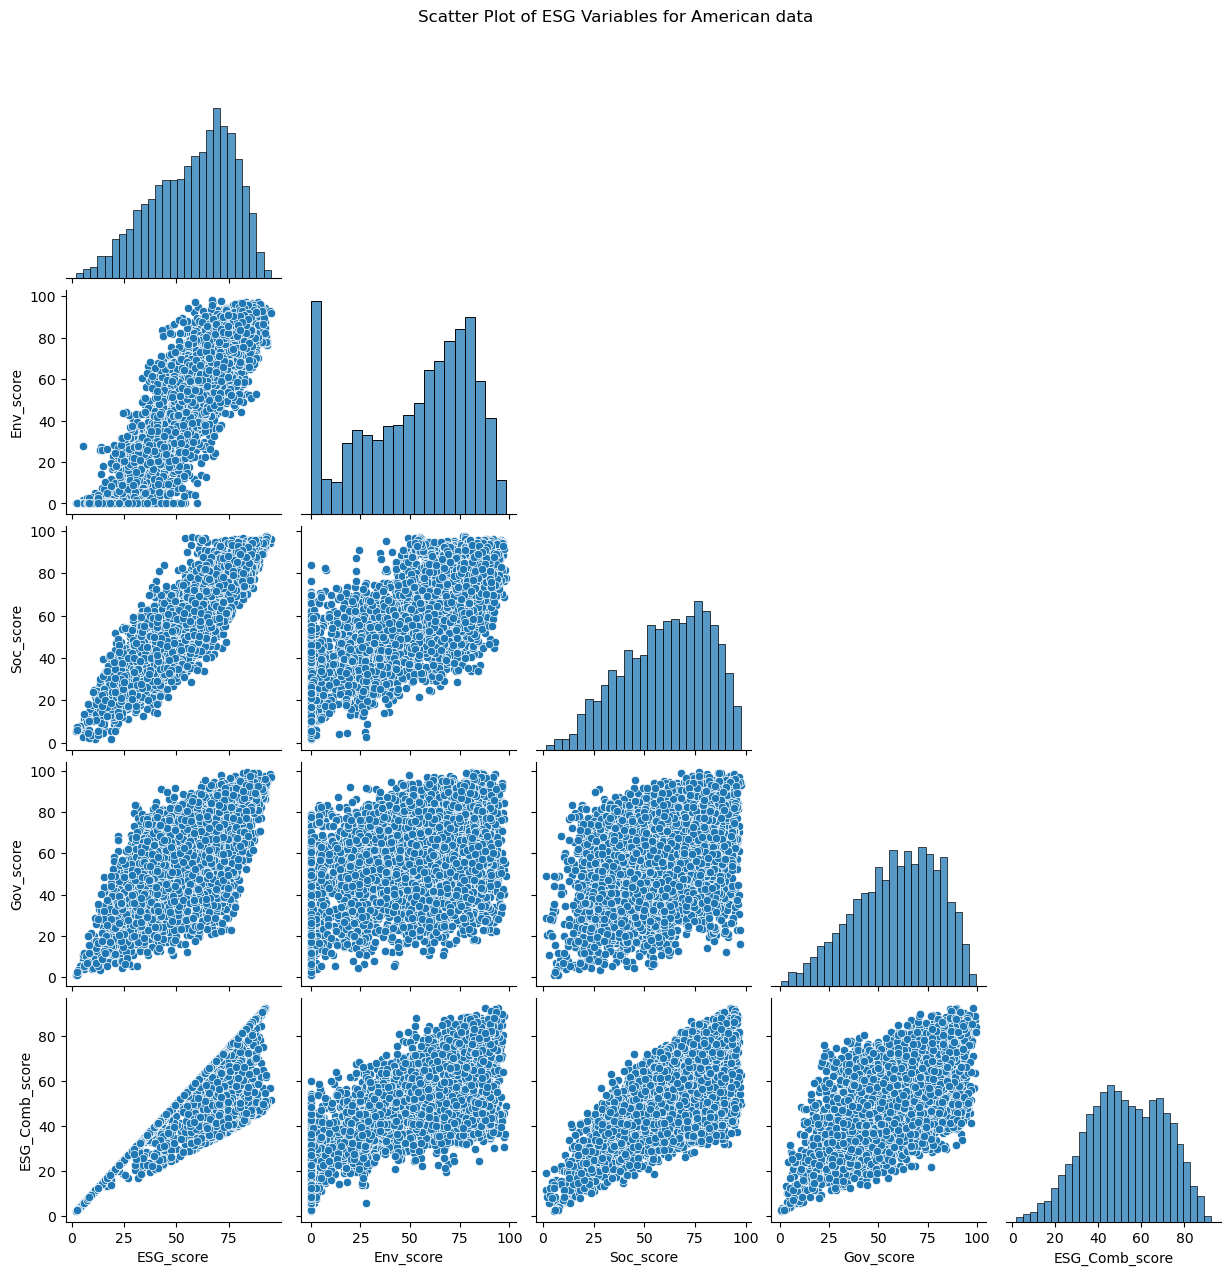

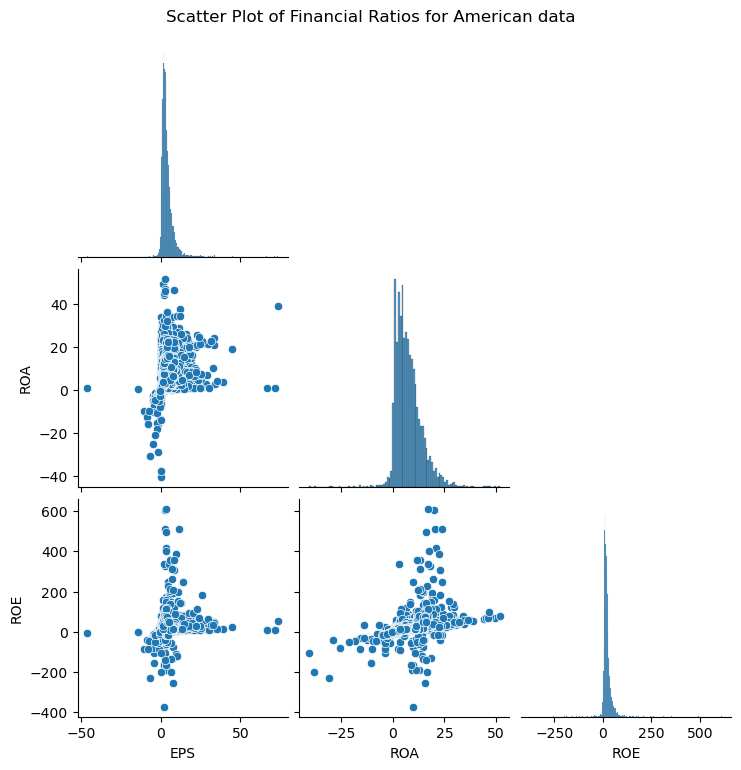

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named df
esg_vars = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']
fin_vars = ['EPS', 'ROA', 'ROE']

sns.pairplot(df[esg_vars], corner=True)
plt.suptitle("Scatter Plot of ESG Variables for American data", y=1.02)
fig.savefig("scatter_matrix_ESG_USA.pdf")
plt.show()
plt.show()

sns.pairplot(df[fin_vars], corner=True)
plt.suptitle("Scatter Plot of Financial Ratios for American data", y=1.02)
fig.savefig("scatter_matrix_Financial_USA.pdf")
plt.show()
plt.show()

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define your ESG and Financial variables
esg_vars = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']
fin_vars = ['EPS', 'ROA', 'ROE']

# ESG scatter plot (lower triangle only)
g_esg = sns.pairplot(df[esg_vars], corner=True)
g_esg.fig.suptitle("Scatter Plot of ESG Variables for American Data", y=1.02)
g_esg.fig.savefig("scatter_matrix_ESG_USA_final.pdf")
plt.close(g_esg.fig)  # Close to avoid overlap with next plot

# Financial ratios scatter plot (lower triangle only)
g_fin = sns.pairplot(df[fin_vars], corner=True)
g_fin.fig.suptitle("Scatter Plot of Financial Ratios for American Data", y=1.02)
g_fin.fig.savefig("scatter_matrix_Financial_USA_final.pdf")
plt.close(g_fin.fig)

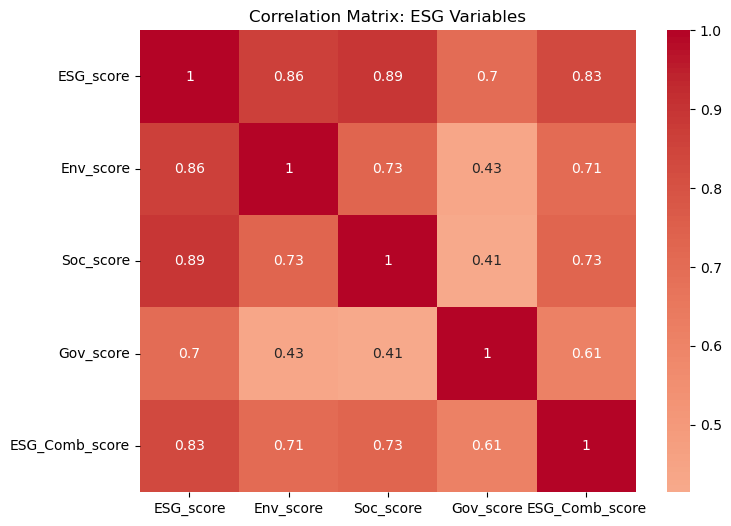

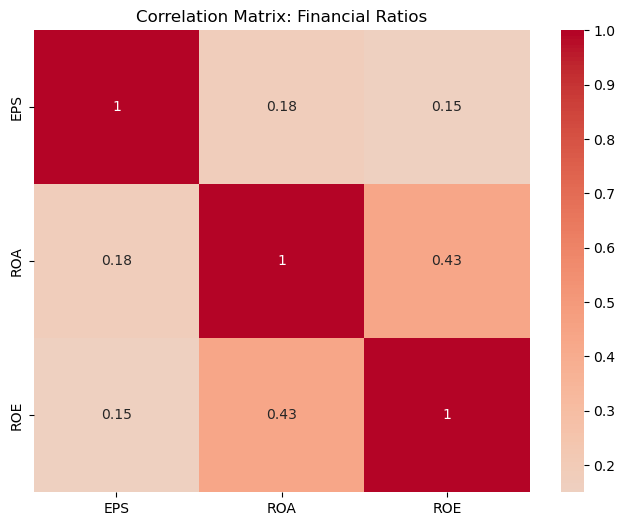

In [13]:
# --- Correlation matrix ---
def plot_corr_matrix(variables, title):
    corr = df[variables].dropna().corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
    plt.title(title)
    plt.show()

plot_corr_matrix(esg_vars, "Correlation Matrix: ESG Variables")
plot_corr_matrix(fin_vars, "Correlation Matrix: Financial Ratios")

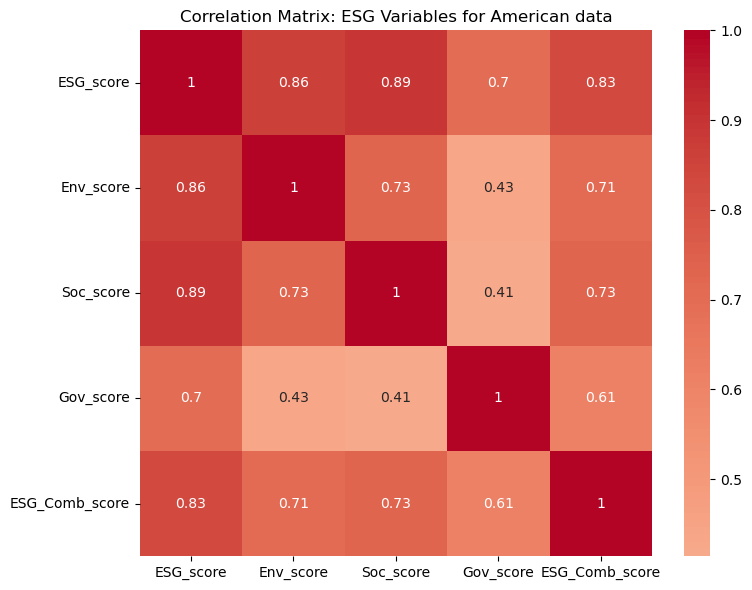

In [45]:
# --- Correlation matrix ---
def plot_corr_matrix(variables, title, filename):
    corr = df[variables].dropna().corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
    plt.title(title)
    plt.tight_layout()
    plt.savefig(filename)  # Save the figure
    plt.show()

# Save the ESG correlation matrix
plot_corr_matrix(esg_vars, "Correlation Matrix: ESG Variables for American data", "correlation_matrix_ESG_USA.pdf")


In [43]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# ESG variables
esg_vars = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']
df_esg = df[esg_vars].dropna()
X_scaled = StandardScaler().fit_transform(df_esg)
X_df = pd.DataFrame(X_scaled, columns=esg_vars)

vif_data = []

for i, var in enumerate(esg_vars):
    X_other = X_df.drop(columns=var)
    y_target = X_df[var]

    reg = LinearRegression().fit(X_other, y_target)
    r_squared = reg.score(X_other, y_target)
    vif = 1 / (1 - r_squared) if r_squared < 1 else float("inf")

    vif_data.append({
        'Feature': var,
        'R_squared': round(r_squared, 4),
        'VIF': round(vif, 2)
    })

vif_esg_df = pd.DataFrame(vif_data)
print("VIF and R² for ESG Variables:")
print(vif_esg_df)

VIF and R² for ESG Variables:
          Feature  R_squared    VIF
0       ESG_score     0.9860  71.24
1       Env_score     0.9104  11.16
2       Soc_score     0.9444  17.97
3       Gov_score     0.8928   9.33
4  ESG_Comb_score     0.6973   3.30


In [37]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# ESG variables
esg_vars = ['EPS', 'ROA', 'ROE']
df_esg = df[esg_vars].dropna()
X_scaled = StandardScaler().fit_transform(df_esg)
X_df = pd.DataFrame(X_scaled, columns=esg_vars)

vif_data = []

for i, var in enumerate(esg_vars):
    X_other = X_df.drop(columns=var)
    y_target = X_df[var]

    reg = LinearRegression().fit(X_other, y_target)
    r_squared = reg.score(X_other, y_target)
    vif = 1 / (1 - r_squared) if r_squared < 1 else float("inf")

    vif_data.append({
        'Feature': var,
        'R_squared': round(r_squared, 4),
        'VIF': round(vif, 2)
    })

vif_esg_df = pd.DataFrame(vif_data)
print("VIF and R² for ESG Variables:")
print(vif_esg_df)

VIF and R² for ESG Variables:
  Feature  R_squared   VIF
0     EPS     0.0378  1.04
1     ROA     0.1993  1.25
2     ROE     0.1921  1.24


In [47]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# ESG variables
esg_vars = ['Env_score', 'Soc_score', 'Gov_score']
df_esg = df[esg_vars].dropna()
X_scaled = StandardScaler().fit_transform(df_esg)
X_df = pd.DataFrame(X_scaled, columns=esg_vars)

vif_data = []

for i, var in enumerate(esg_vars):
    X_other = X_df.drop(columns=var)
    y_target = X_df[var]

    reg = LinearRegression().fit(X_other, y_target)
    r_squared = reg.score(X_other, y_target)
    vif = 1 / (1 - r_squared) if r_squared < 1 else float("inf")

    vif_data.append({
        'Feature': var,
        'R_squared': round(r_squared, 4),
        'VIF': round(vif, 2)
    })

vif_esg_df = pd.DataFrame(vif_data)
print("VIF and R² for ESG Variables:")
print(vif_esg_df)

VIF and R² for ESG Variables:
     Feature  R_squared   VIF
0  Env_score     0.5551  2.25
1  Soc_score     0.5460  2.20
2  Gov_score     0.2086  1.26


# Check Skewness

Skewness:
 ROE               5.802252
EPS               4.398633
ROA               0.879737
ESG_Comb_score   -0.141758
Soc_score        -0.384157
Gov_score        -0.386558
ESG_score        -0.475292
Env_score        -0.525475
dtype: float64


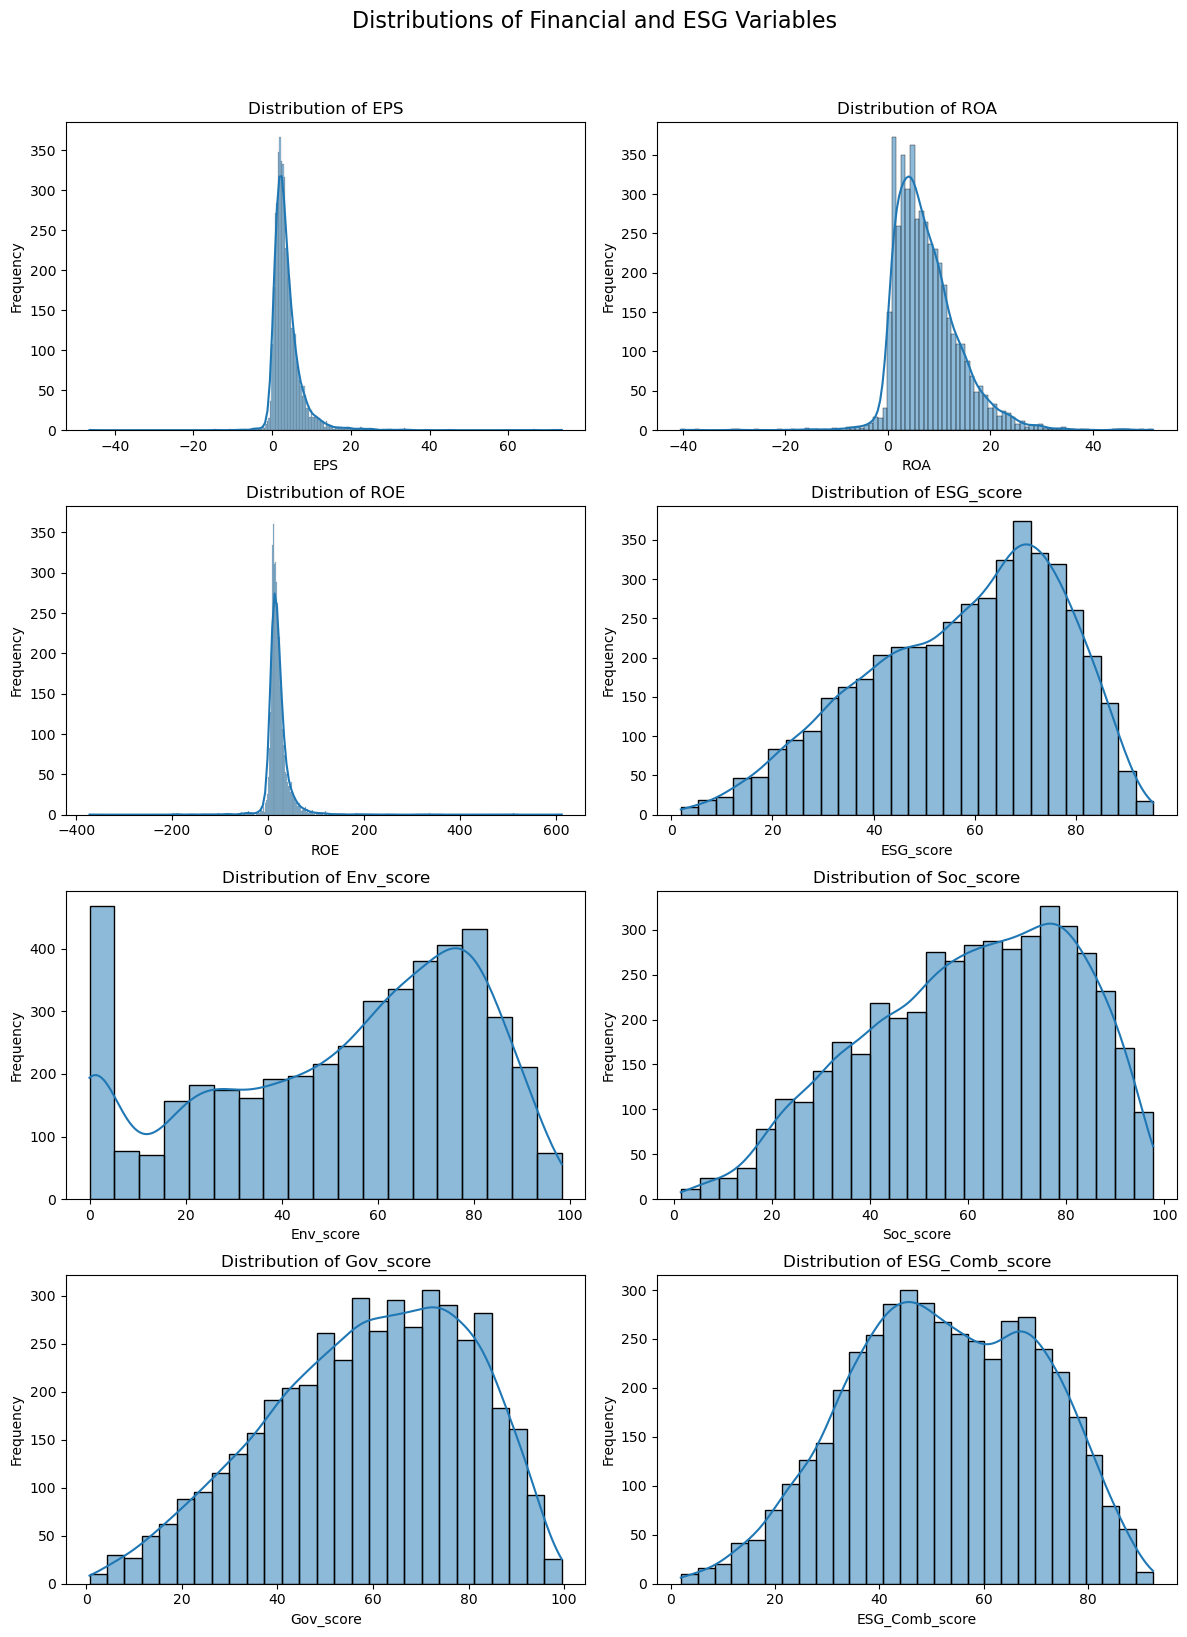

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Assuming your DataFrame is called `df`
variables_to_check = ['EPS', 'ROA', 'ROE', 'ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

# 1. Skewness values
skewness = df[variables_to_check].skew().sort_values(ascending=False)
print("Skewness:\n", skewness)

# 2. Create one figure with all histograms
n_vars = len(variables_to_check)
n_cols = 2
n_rows = int(np.ceil(n_vars / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()

for i, var in enumerate(variables_to_check):
    sns.histplot(df[var].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Frequency")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
fig.suptitle("Distributions of Financial and ESG Variables", fontsize=16, y=1.02)
plt.subplots_adjust(top=0.95)

# Save to PDF
fig.savefig("distributions_ESG_financial_vars_USA.pdf", bbox_inches='tight')
plt.show()


# Log Transforming

Minimum values before transformation:
EPS    -46.4
ROA    -40.4
ROE   -372.2
dtype: float64

First few rows of the transformed columns:
    log_EPS   log_ROA   log_ROE
0  3.896300  3.935740  5.981414
1  3.899140  3.935740  5.995706
2  3.875359  3.808882  5.951684
3  3.899950  3.885679  5.979898
4  3.918999  3.962716  5.994211


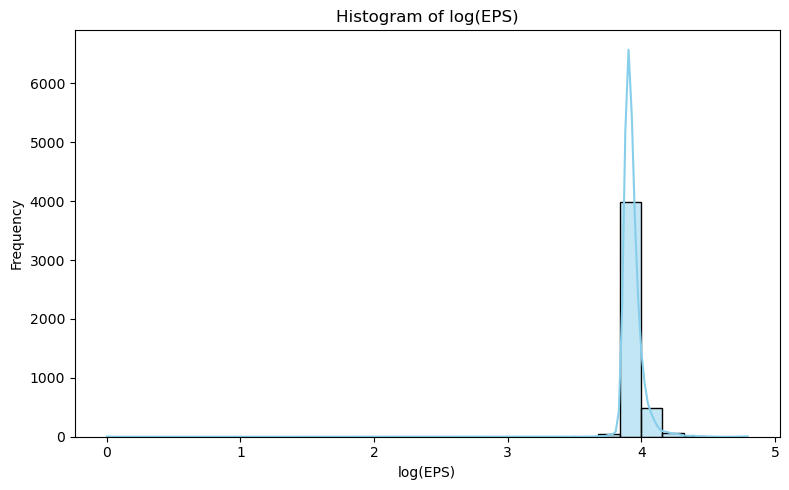

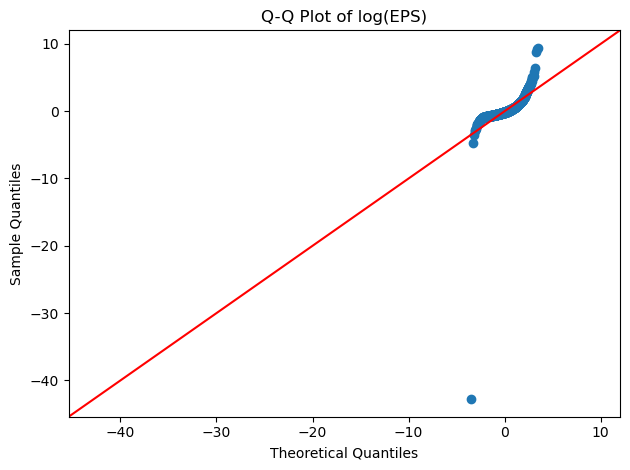

Kolmogorov–Smirnov Test for log(EPS):
  Test statistic: 0.1860786426
  p-value       : 0.0000000000
------------------------------------------------------------


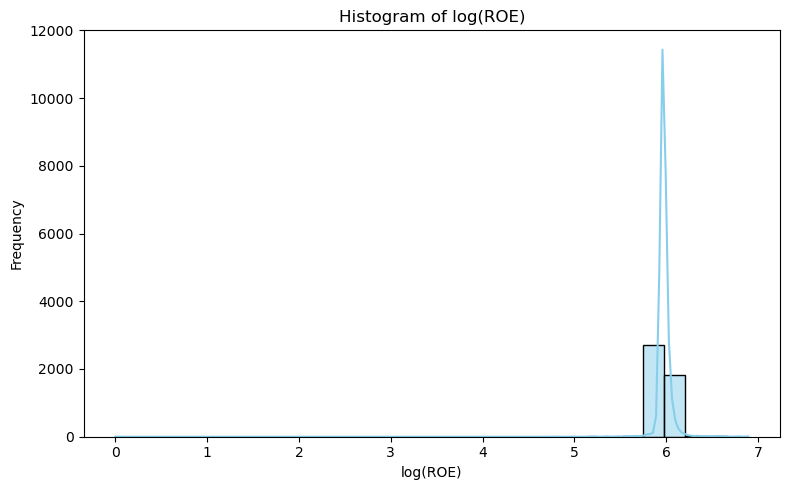

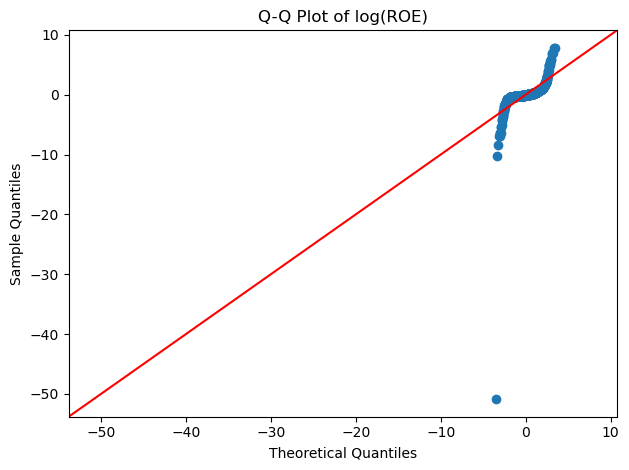

Kolmogorov–Smirnov Test for log(ROE):
  Test statistic: 0.3002752818
  p-value       : 0.0000000000
------------------------------------------------------------


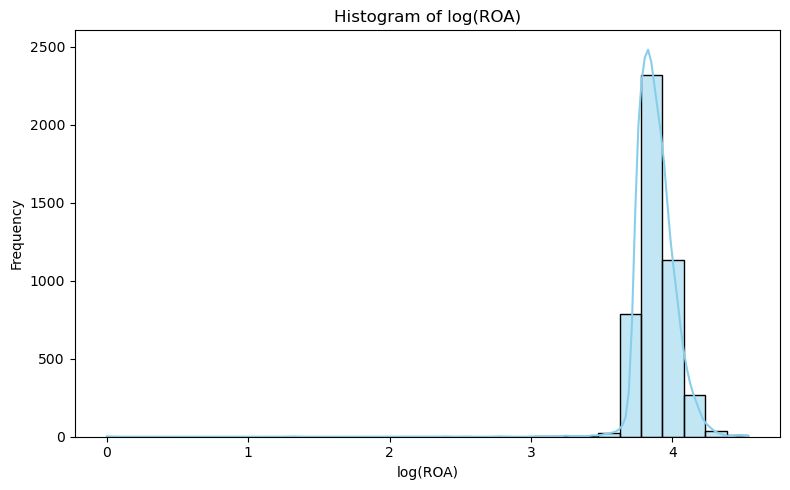

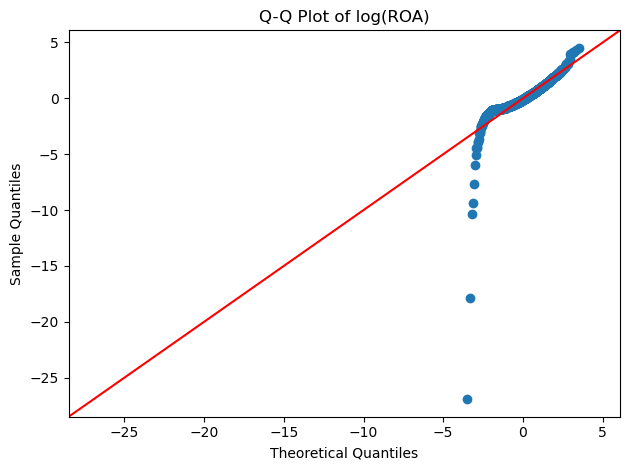

Kolmogorov–Smirnov Test for log(ROA):
  Test statistic: 0.1185177453
  p-value       : 0.0000000000
------------------------------------------------------------


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import kstest, norm

# Copy to avoid modifying the original DataFrame
df_transformed = df.copy()

# Columns to transform
cols = ['EPS', 'ROA', 'ROE']

# Print minimum values before transformation
min_values = df[cols].min()
print("Minimum values before transformation:")
print(min_values)

# Log transformation with shifting to handle negative values
for col in cols:
    shift = abs(min_values[col]) + 1  # ensure positive values
    df_transformed[f'log_{col}'] = np.log(df_transformed[col] + shift)

# Check results
print("\nFirst few rows of the transformed columns:")
print(df_transformed[[f'log_{col}' for col in cols]].head())

# Function to check for log-normality
def check_log_normality(df, var):
    log_var = f'log_{var}'
    log_data = df[log_var].dropna()

    # Plot histogram and KDE
    plt.figure(figsize=(8, 5))
    sns.histplot(log_data, kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of log({var})')
    plt.xlabel(f'log({var})')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Q-Q plot
    sm.qqplot(log_data, line='45', fit=True)
    plt.title(f'Q-Q Plot of log({var})')
    plt.tight_layout()
    plt.show()

    # Kolmogorov–Smirnov test against normal distribution
    standardized_data = (log_data - log_data.mean()) / log_data.std()
    ks_stat, ks_pval = kstest(standardized_data, 'norm')

    print(f"Kolmogorov–Smirnov Test for log({var}):")
    print(f"  Test statistic: {ks_stat:.10f}")
    print(f"  p-value       : {ks_pval:.10f}")
    print("-" * 60)

# Variables to check
vars_to_check = ['EPS', 'ROE', 'ROA']

# Run the check
for var in vars_to_check:
    check_log_normality(df_transformed, var)


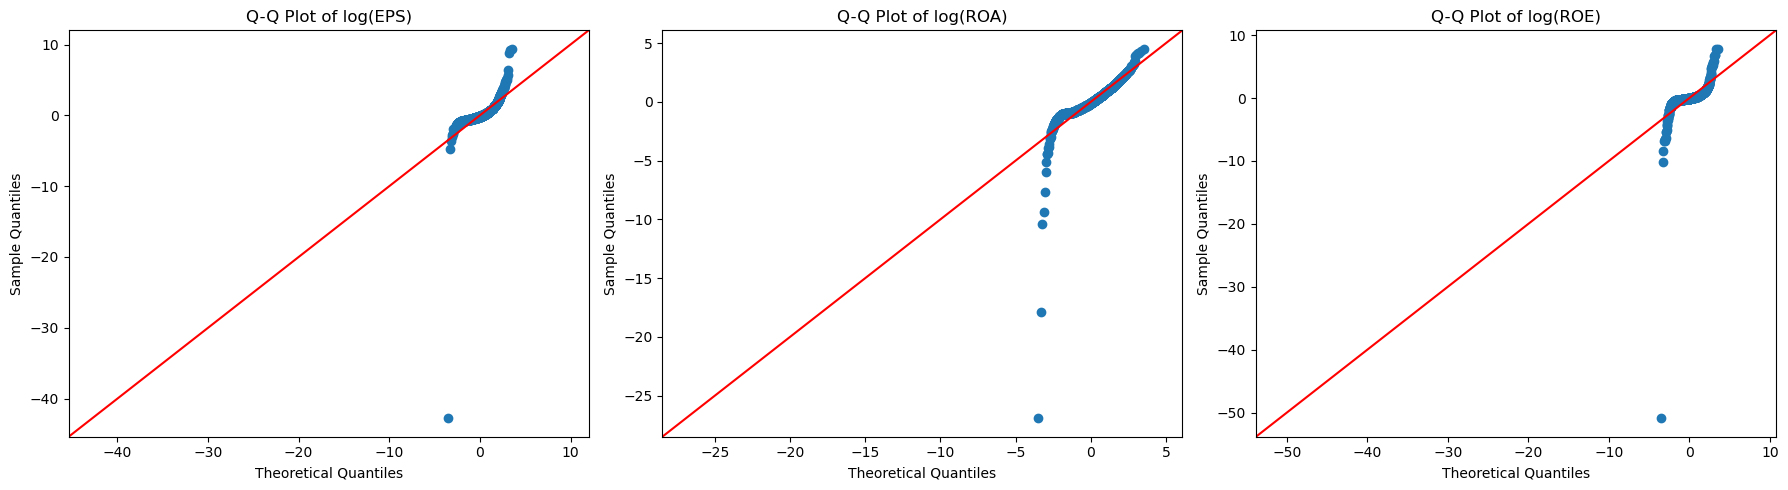

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import kstest

# Copy to avoid modifying the original DataFrame
df_transformed = df.copy()

# Columns to transform
cols = ['EPS', 'ROA', 'ROE']
min_values = df[cols].min()

# Apply log transformation with shifting
for col in cols:
    shift = abs(min_values[col]) + 1
    df_transformed[f'log_{col}'] = np.log(df_transformed[col] + shift)

# --- Create one figure with Q-Q plots for each variable ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, var in enumerate(cols):
    log_var = f'log_{var}'
    log_data = df_transformed[log_var].dropna()
    
    sm.qqplot(log_data, line='45', fit=True, ax=axes[i])
    axes[i].set_title(f'Q-Q Plot of log({var})')

plt.tight_layout()
plt.savefig("qq_plots_log_vars_USA.pdf")  # Save as PDF
plt.show()


# Check Polynomial assumptions


--- Diagnostics for model with dependent variable: EPS ---
Kolmogorov-Smirnov test for normality of residuals:
  KS statistic: 0.15081
  p-value     : 0.00000
Anderson-Darling test for normality of residuals:
  A-D statistic: 236.08309
  Critical values: [0.575 0.655 0.786 0.917 1.091]
  Significance levels: [15.  10.   5.   2.5  1. ]
    At 15.0% level: Reject normality
    At 10.0% level: Reject normality
    At 5.0% level: Reject normality
    At 2.5% level: Reject normality
    At 1.0% level: Reject normality

--- Diagnostics for model with dependent variable: ROA ---
Kolmogorov-Smirnov test for normality of residuals:
  KS statistic: 0.08615
  p-value     : 0.00000
Anderson-Darling test for normality of residuals:
  A-D statistic: 84.43848
  Critical values: [0.575 0.655 0.786 0.917 1.091]
  Significance levels: [15.  10.   5.   2.5  1. ]
    At 15.0% level: Reject normality
    At 10.0% level: Reject normality
    At 5.0% level: Reject normality
    At 2.5% level: Reject normali

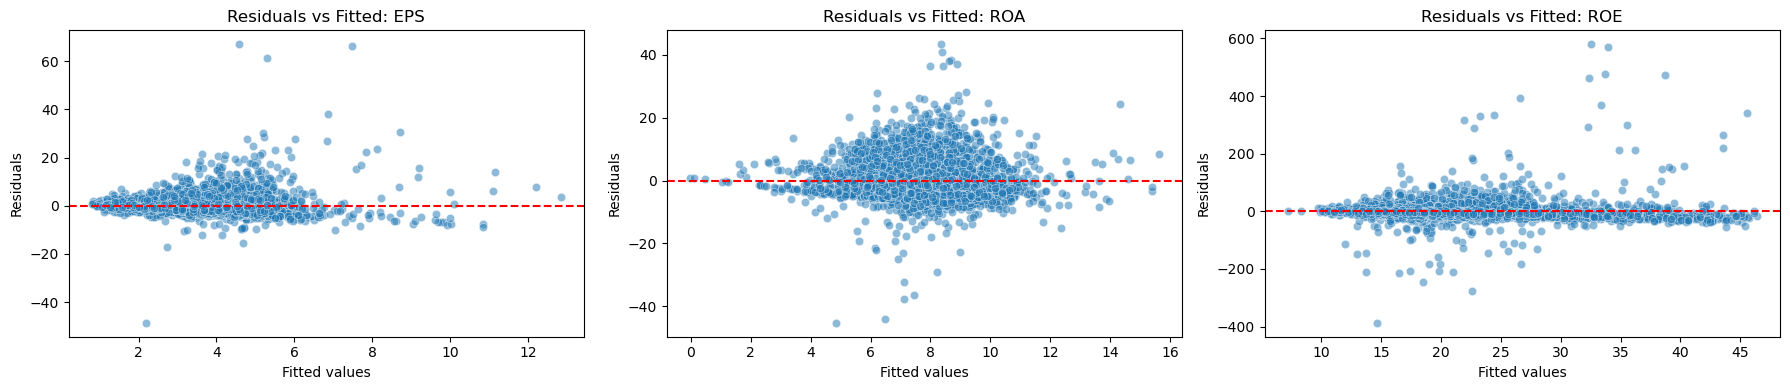

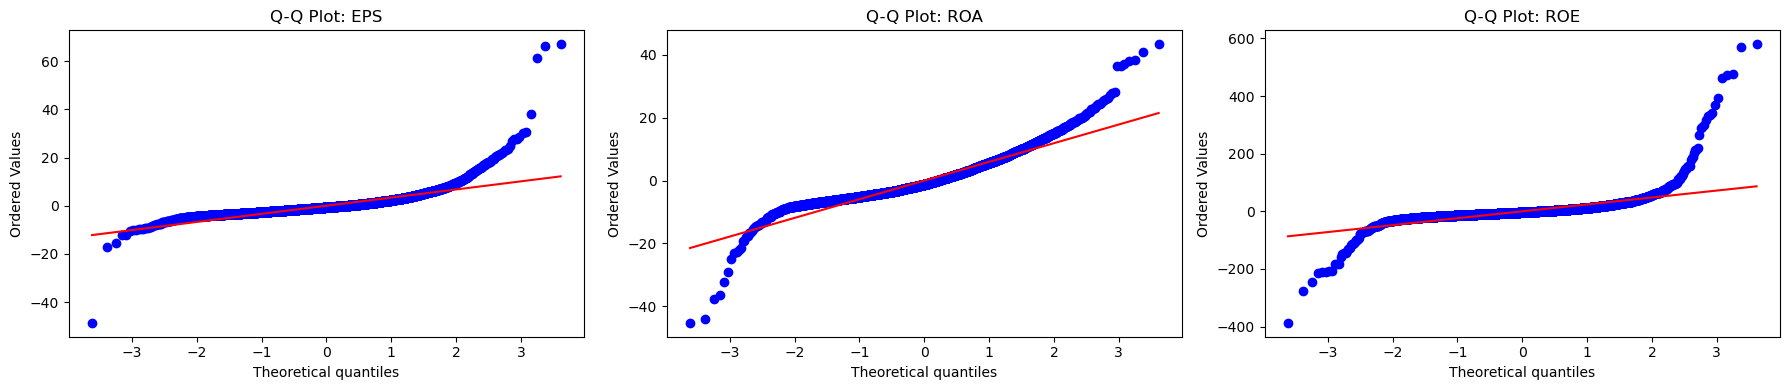

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pygam import LinearGAM, s
import numpy as np

# Assuming df is already cleaned and defined
X = df[['Env_score', 'Soc_score', 'Gov_score']].values
targets = ['EPS', 'ROA', 'ROE']

n_targets = len(targets)

# Side-by-side subplots: 1 row, n_targets columns
fig_resid, axes_resid = plt.subplots(1, n_targets, figsize=(6 * n_targets, 4))
fig_qq, axes_qq = plt.subplots(1, n_targets, figsize=(6 * n_targets, 4))

for i, target in enumerate(targets):
    y = df[target].values
    gam = LinearGAM(s(0) + s(1) + s(2)).fit(X, y)

    residuals = gam.deviance_residuals(X, y)
    fitted = gam.predict(X)

    print(f"\n--- Diagnostics for model with dependent variable: {target} ---")

    # Kolmogorov-Smirnov Test
    standardized_resid = (residuals - np.mean(residuals)) / np.std(residuals)
    ks_stat, ks_pval = stats.kstest(standardized_resid, 'norm')
    print("Kolmogorov-Smirnov test for normality of residuals:")
    print(f"  KS statistic: {ks_stat:.5f}")
    print(f"  p-value     : {ks_pval:.5f}")

    # Anderson-Darling Test
    ad_result = stats.anderson(residuals, dist='norm')
    print("Anderson-Darling test for normality of residuals:")
    print(f"  A-D statistic: {ad_result.statistic:.5f}")
    print("  Critical values:", ad_result.critical_values)
    print("  Significance levels:", ad_result.significance_level)
    for cv, sl in zip(ad_result.critical_values, ad_result.significance_level):
        result = "Reject normality" if ad_result.statistic > cv else "Do not reject normality"
        print(f"    At {sl}% level: {result}")

    # Plot 1: Residuals vs Fitted
    ax1 = axes_resid[i]
    sns.scatterplot(x=fitted, y=residuals, alpha=0.5, ax=ax1)
    ax1.axhline(0, color='red', linestyle='--')
    ax1.set_title(f'Residuals vs Fitted: {target}')
    ax1.set_xlabel('Fitted values')
    ax1.set_ylabel('Residuals')

    # Plot 2: Q-Q Plot
    ax2 = axes_qq[i]
    stats.probplot(residuals, dist="norm", plot=ax2)
    ax2.set_title(f'Q-Q Plot: {target}')

# Adjust layout and save
fig_resid.tight_layout()
fig_qq.tight_layout()

fig_resid.savefig('residuals_vs_fitted_all_targets_USA_1.pdf')
fig_qq.savefig('qq_plots_all_targets_USA_1.pdf')


    # # --- Plot 3: Histogram of Residuals ---
    # plt.figure(figsize=(6, 4))
    # sns.histplot(residuals, kde=True, bins=30)
    # plt.title(f'Histogram of Residuals for {target}')
    # plt.xlabel('Residuals')
    # plt.tight_layout()
    # plt.show()


--- Diagnostics for model with dependent variable: ESG_score ---
Kolmogorov-Smirnov test for normality of residuals:
  KS statistic: 0.04503
  p-value     : 0.00000
Anderson-Darling test for normality of residuals:
  A-D statistic: 17.33025
  Critical values: [0.575 0.655 0.786 0.917 1.091]
  Significance levels: [15.  10.   5.   2.5  1. ]
    At 15.0% level: Reject normality
    At 10.0% level: Reject normality
    At 5.0% level: Reject normality
    At 2.5% level: Reject normality
    At 1.0% level: Reject normality

--- Diagnostics for model with dependent variable: Env_score ---
Kolmogorov-Smirnov test for normality of residuals:
  KS statistic: 0.08476
  p-value     : 0.00000
Anderson-Darling test for normality of residuals:
  A-D statistic: 64.68998
  Critical values: [0.575 0.655 0.786 0.917 1.091]
  Significance levels: [15.  10.   5.   2.5  1. ]
    At 15.0% level: Reject normality
    At 10.0% level: Reject normality
    At 5.0% level: Reject normality
    At 2.5% level: Rej

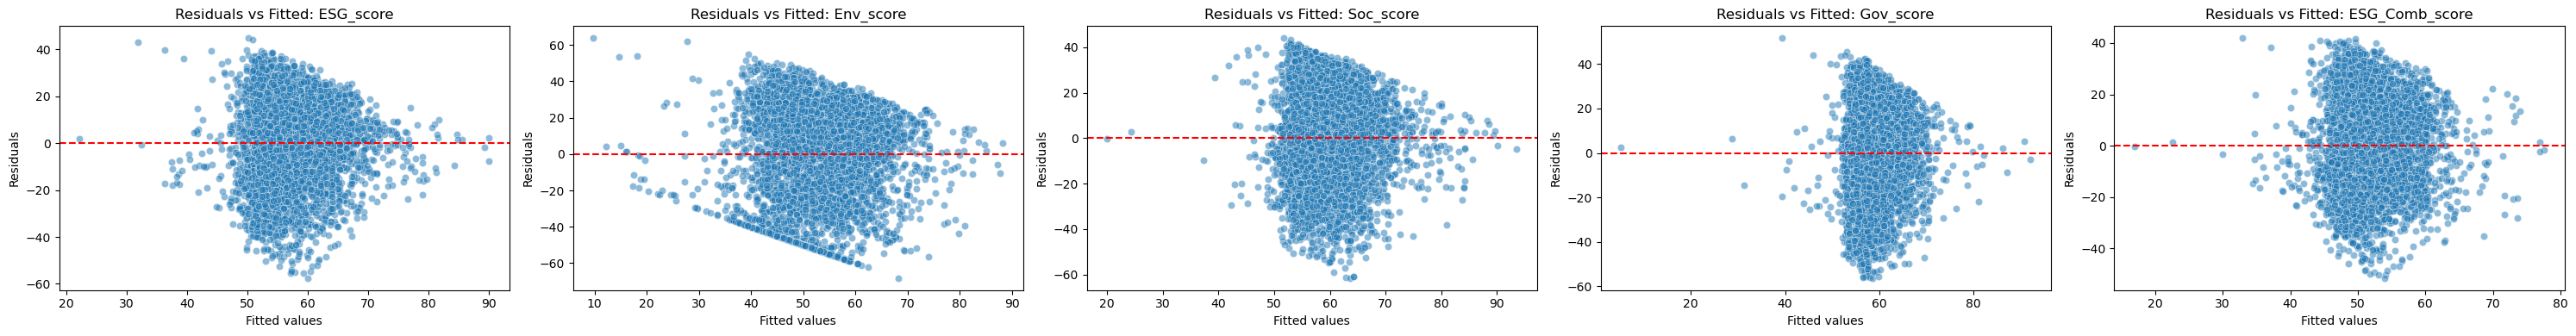

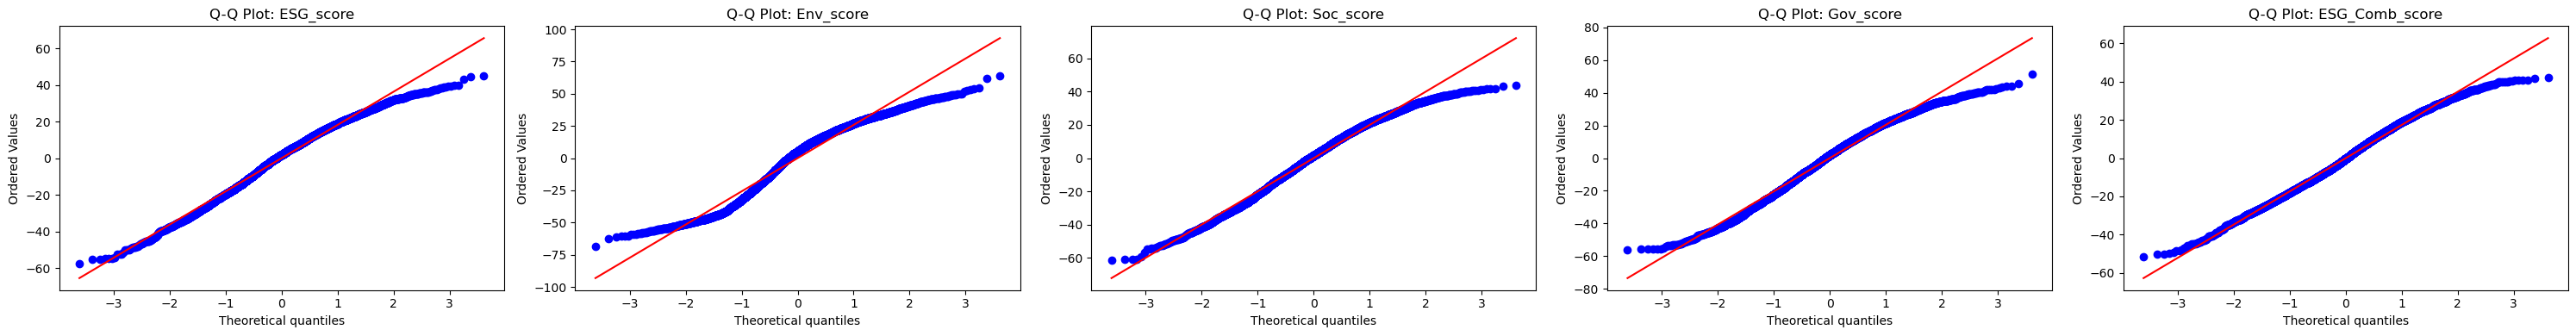

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pygam import LinearGAM, s
import numpy as np

# Assuming df is already defined and cleaned
X = df[['EPS', 'ROA', 'ROE']].values
targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

n_targets = len(targets)

# Create side-by-side subplots
fig_resid, axes_resid = plt.subplots(1, n_targets, figsize=(6 * n_targets, 4))
fig_qq, axes_qq = plt.subplots(1, n_targets, figsize=(6 * n_targets, 4))

for i, target in enumerate(targets):
    y = df[target].values
    gam = LinearGAM(s(0) + s(1) + s(2)).fit(X, y)

    residuals = gam.deviance_residuals(X, y)
    fitted = gam.predict(X)

    print(f"\n--- Diagnostics for model with dependent variable: {target} ---")

    # Kolmogorov-Smirnov Test
    standardized_resid = (residuals - np.mean(residuals)) / np.std(residuals)
    ks_stat, ks_pval = stats.kstest(standardized_resid, 'norm')
    print("Kolmogorov-Smirnov test for normality of residuals:")
    print(f"  KS statistic: {ks_stat:.5f}")
    print(f"  p-value     : {ks_pval:.5f}")

    # Anderson-Darling Test
    ad_result = stats.anderson(residuals, dist='norm')
    print("Anderson-Darling test for normality of residuals:")
    print(f"  A-D statistic: {ad_result.statistic:.5f}")
    print("  Critical values:", ad_result.critical_values)
    print("  Significance levels:", ad_result.significance_level)
    for cv, sl in zip(ad_result.critical_values, ad_result.significance_level):
        result = "Reject normality" if ad_result.statistic > cv else "Do not reject normality"
        print(f"    At {sl}% level: {result}")

    # Plot 1: Residuals vs Fitted
    ax1 = axes_resid[i]
    sns.scatterplot(x=fitted, y=residuals, alpha=0.5, ax=ax1)
    ax1.axhline(0, color='red', linestyle='--')
    ax1.set_title(f'Residuals vs Fitted: {target}')
    ax1.set_xlabel('Fitted values')
    ax1.set_ylabel('Residuals')

    # Plot 2: Q-Q Plot
    ax2 = axes_qq[i]
    stats.probplot(residuals, dist="norm", plot=ax2)
    ax2.set_title(f'Q-Q Plot: {target}')

# Adjust layout and save
fig_resid.tight_layout()
fig_qq.tight_layout()

fig_resid.savefig('residuals_vs_fitted_all_targets_USA_2.pdf')
fig_qq.savefig('qq_plots_all_targets_USA_2.pdf')


    # # --- Plot 3: Histogram of Residuals ---
    # plt.figure(figsize=(6, 4))
    # sns.histplot(residuals, kde=True, bins=30)
    # plt.title(f'Histogram of Residuals for {target}')
    # plt.xlabel('Residuals')
    # plt.tight_layout()
    # plt.show()

# GAM

### financial ratios as dependent

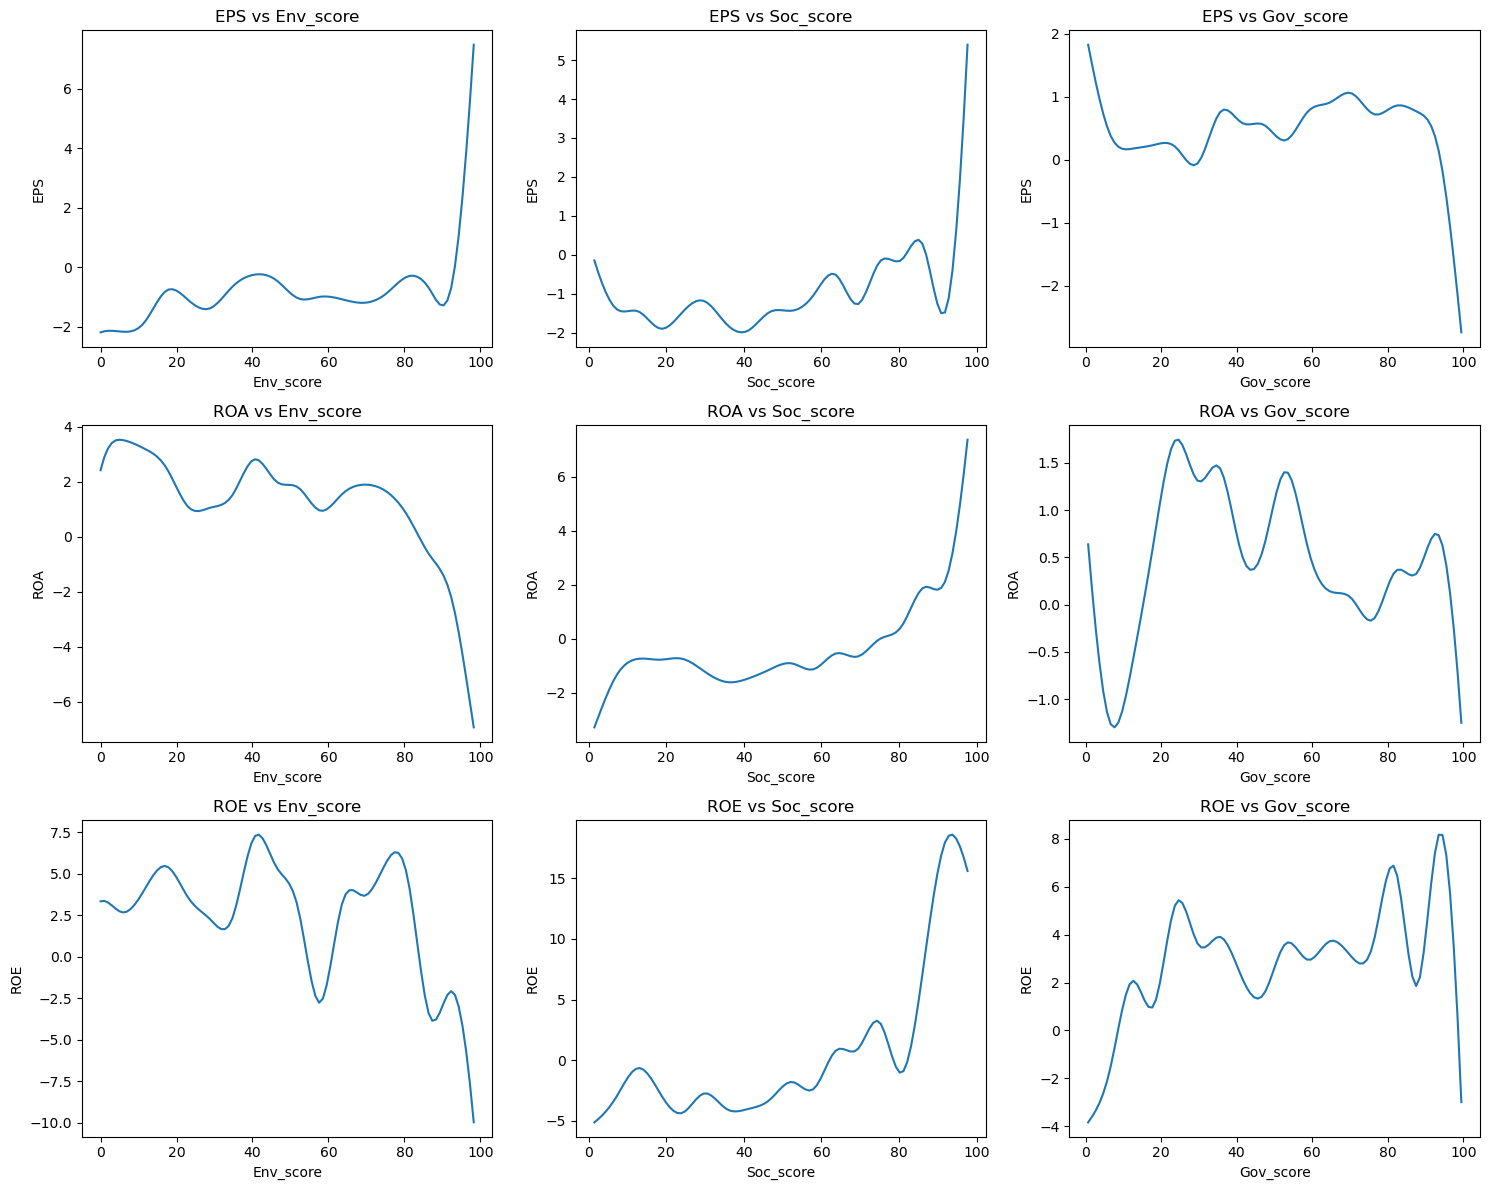

In [13]:
import pandas as pd
from pygam import LinearGAM, s
import matplotlib.pyplot as plt

# Clean the data first
df_clean = df.dropna(subset=['Env_score', 'Soc_score', 'Gov_score', 'EPS', 'ROA', 'ROE'])

# Define X after cleaning
X = df_clean[['Env_score', 'Soc_score', 'Gov_score']].values

results = {}
targets = ['EPS', 'ROA', 'ROE']
features = ['Env_score', 'Soc_score', 'Gov_score']

plt.figure(figsize=(15, 12))  # Big figure for all plots

for row_idx, target in enumerate(targets):
    y = df_clean[target].values  # Use df_clean, not df
    
    gam = LinearGAM(s(0) + s(1) + s(2)).fit(X, y)
    results[target] = gam
    
    for col_idx, feature in enumerate(features):
        plt.subplot(len(targets), len(features), row_idx * len(features) + col_idx + 1)
        XX = gam.generate_X_grid(term=col_idx)
        pdp = gam.partial_dependence(term=col_idx, X=XX)
        plt.plot(XX[:, col_idx], pdp)
        plt.title(f'{target} vs {feature}')
        plt.xlabel(feature)
        plt.ylabel(target)

plt.tight_layout()
plt.savefig('GAM_all_targets_USA.pdf')
plt.show()


In [15]:
import numpy as np
import pandas as pd
from pygam import LinearGAM, s
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Clean your data
df_clean = df.dropna(subset=['Env_score', 'Soc_score', 'Gov_score', 'EPS', 'ROA', 'ROE'])
X = df_clean[['Env_score', 'Soc_score', 'Gov_score']].values

# Store polynomial coefficients
polynomials = {}

# Loop over each financial ratio
for target in ['EPS', 'ROA', 'ROE']:
    y = df_clean[target].values
    gam = LinearGAM(s(0) + s(1) + s(2)).fit(X, y)

    feature_names = ['Env_score', 'Soc_score', 'Gov_score']
    poly_dict = {}

    for i, feature in enumerate(feature_names):
        grid = gam.generate_X_grid(term=i)
        f_vals = gam.partial_dependence(term=i, X=grid).flatten()
        x_vals = grid[:, i]

        # Fit a degree-3 polynomial (cubic) to the smooth function
        p = Polynomial.fit(x_vals, f_vals, deg=3)
        poly_dict[feature] = p.convert().coef  # Convert to power basis (standard polynomial form)

    polynomials[target] = poly_dict

In [17]:
polynomials['ROE']

{'Env_score': array([ 4.41963567e+00, -1.43817869e-01,  5.16536351e-03, -4.85406833e-05]),
 'Soc_score': array([-4.46094571e+00,  2.34826583e-01, -8.69596755e-03,  8.99337081e-05]),
 'Gov_score': array([-2.88699821e+00,  3.59836128e-01, -6.34782062e-03,  3.57986417e-05])}

In [19]:
polynomials['ROA']

{'Env_score': array([ 4.43014520e+00, -2.41955012e-01,  6.38030549e-03, -4.98114968e-05]),
 'Soc_score': array([-2.53848313e+00,  1.55028845e-01, -4.47439514e-03,  3.78082119e-05]),
 'Gov_score': array([-1.32501045e+00,  1.56350282e-01, -3.06408176e-03,  1.66364340e-05])}

In [21]:
polynomials['EPS']

{'Env_score': array([-3.18475237e+00,  2.08733526e-01, -5.22227465e-03,  3.77401337e-05]),
 'Soc_score': array([-9.49935905e-01, -3.66237974e-02,  4.32590317e-04,  1.71257026e-06]),
 'Gov_score': array([ 1.39411636e+00, -1.23552493e-01,  3.41755669e-03, -2.45769964e-05])}

R² Score: -0.5093
Mean Absolute Error (MAE): 26.8671
Root Mean Squared Error (RMSE): 42.1262


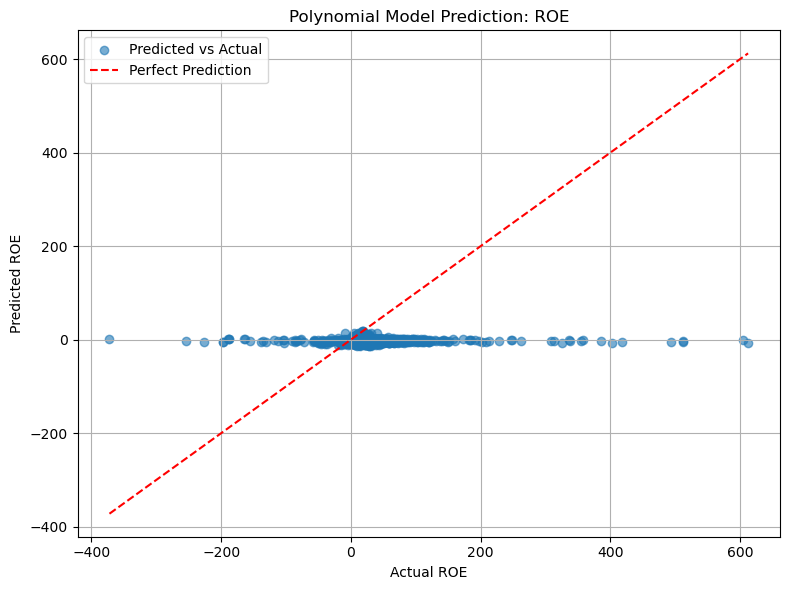

In [23]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Assume your dataframe is named df and contains these columns
# df = pd.read_csv(...) or already loaded

# Define the polynomial functions
def poly_env(x):
    return 5.2924 - 0.0865 * x + 0.001874 * x**2 - 0.0000237 * x**3

def poly_soc(x):
    return 14.0011 - 1.5185 * x + 0.02921 * x**2 - 0.0001592 * x**3

def poly_gov(x):
    return -4.1842 + 0.4289 * x - 0.008987 * x**2 + 0.00005529 * x**3

# Predict the financial ratio (example: ROE)
df = df.dropna(subset=['Env_score', 'Soc_score', 'Gov_score', 'ROE'])  # drop missing rows
predicted_roe = (
    poly_env(df['Env_score'].values) +
    poly_soc(df['Soc_score'].values) +
    poly_gov(df['Gov_score'].values)
)

# True values
actual_roe = df['ROE'].values

# Evaluation metrics
r2 = r2_score(actual_roe, predicted_roe)
mae = mean_absolute_error(actual_roe, predicted_roe)
rmse = np.sqrt(mean_squared_error(actual_roe, predicted_roe))

# Print results
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Optional: Plot
plt.figure(figsize=(8, 6))
plt.scatter(actual_roe, predicted_roe, alpha=0.6, label='Predicted vs Actual')
plt.plot([actual_roe.min(), actual_roe.max()],
         [actual_roe.min(), actual_roe.max()],
         'r--', label='Perfect Prediction')
plt.xlabel('Actual ROE')
plt.ylabel('Predicted ROE')
plt.title('Polynomial Model Prediction: ROE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

🔍 Evaluation for ROA:
R² Score: -1.2674
Mean Absolute Error (MAE): 7.5409
Root Mean Squared Error (RMSE): 9.6200



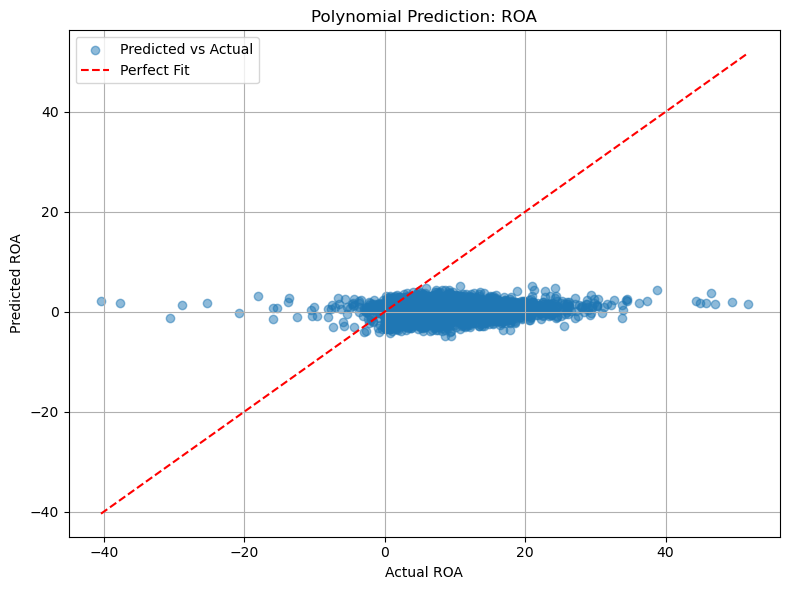

🔍 Evaluation for EPS:
R² Score: -0.5586
Mean Absolute Error (MAE): 3.3377
Root Mean Squared Error (RMSE): 5.2626



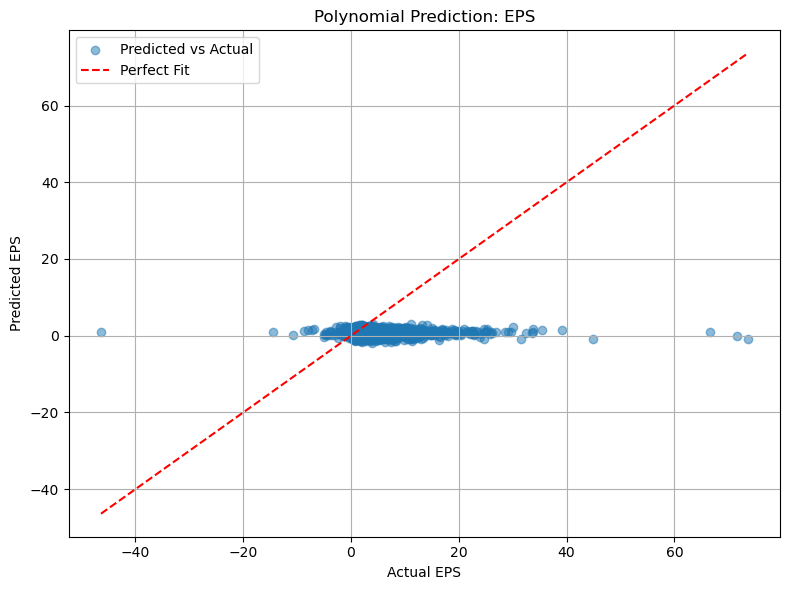

In [25]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Define your cubic polynomial functions using coefficients

# ROA coefficients
ROA_coeffs = {
    'Env_score': [2.74992922, -0.00999348, 0.00005609, -0.00000663],
    'Soc_score': [-1.87849941, -0.00949571, 0.00033732, 0.00000227],
    'Gov_score': [2.12596587, -0.05258974, 0.00031654, -0.00000076]
}

# EPS coefficients
EPS_coeffs = {
    'Env_score': [-0.38027624, -0.03287620, 0.00120416, -0.00000639],
    'Soc_score': [0.88866818, 0.01960365, -0.00104517, 0.00000587],
    'Gov_score': [-0.20422285, 0.02321950, -0.00027326, 0.00000191]
}

# Polynomial evaluation function
def evaluate_poly(x, coeffs):
    return sum(c * x**i for i, c in enumerate(coeffs))

# Prediction function for a financial ratio
def predict(df, coeffs_dict):
    return (
        evaluate_poly(df['Env_score'].values, coeffs_dict['Env_score']) +
        evaluate_poly(df['Soc_score'].values, coeffs_dict['Soc_score']) +
        evaluate_poly(df['Gov_score'].values, coeffs_dict['Gov_score'])
    )

# Evaluation function
def evaluate_model(df, target_col, coeffs_dict, title):
    df_clean = df.dropna(subset=['Env_score', 'Soc_score', 'Gov_score', target_col])
    y_true = df_clean[target_col].values
    y_pred = predict(df_clean, coeffs_dict)

    # Metrics
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    print(f"🔍 Evaluation for {title}:")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}\n")

    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label='Predicted vs Actual')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', label='Perfect Fit')
    plt.xlabel(f'Actual {title}')
    plt.ylabel(f'Predicted {title}')
    plt.title(f'Polynomial Prediction: {title}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Load or assume df is already in memory
# df = pd.read_csv("your_data.csv")

# Evaluate for ROA
evaluate_model(df, target_col='ROA', coeffs_dict=ROA_coeffs, title='ROA')

# Evaluate for EPS
evaluate_model(df, target_col='EPS', coeffs_dict=EPS_coeffs, title='EPS')

# ESG as target

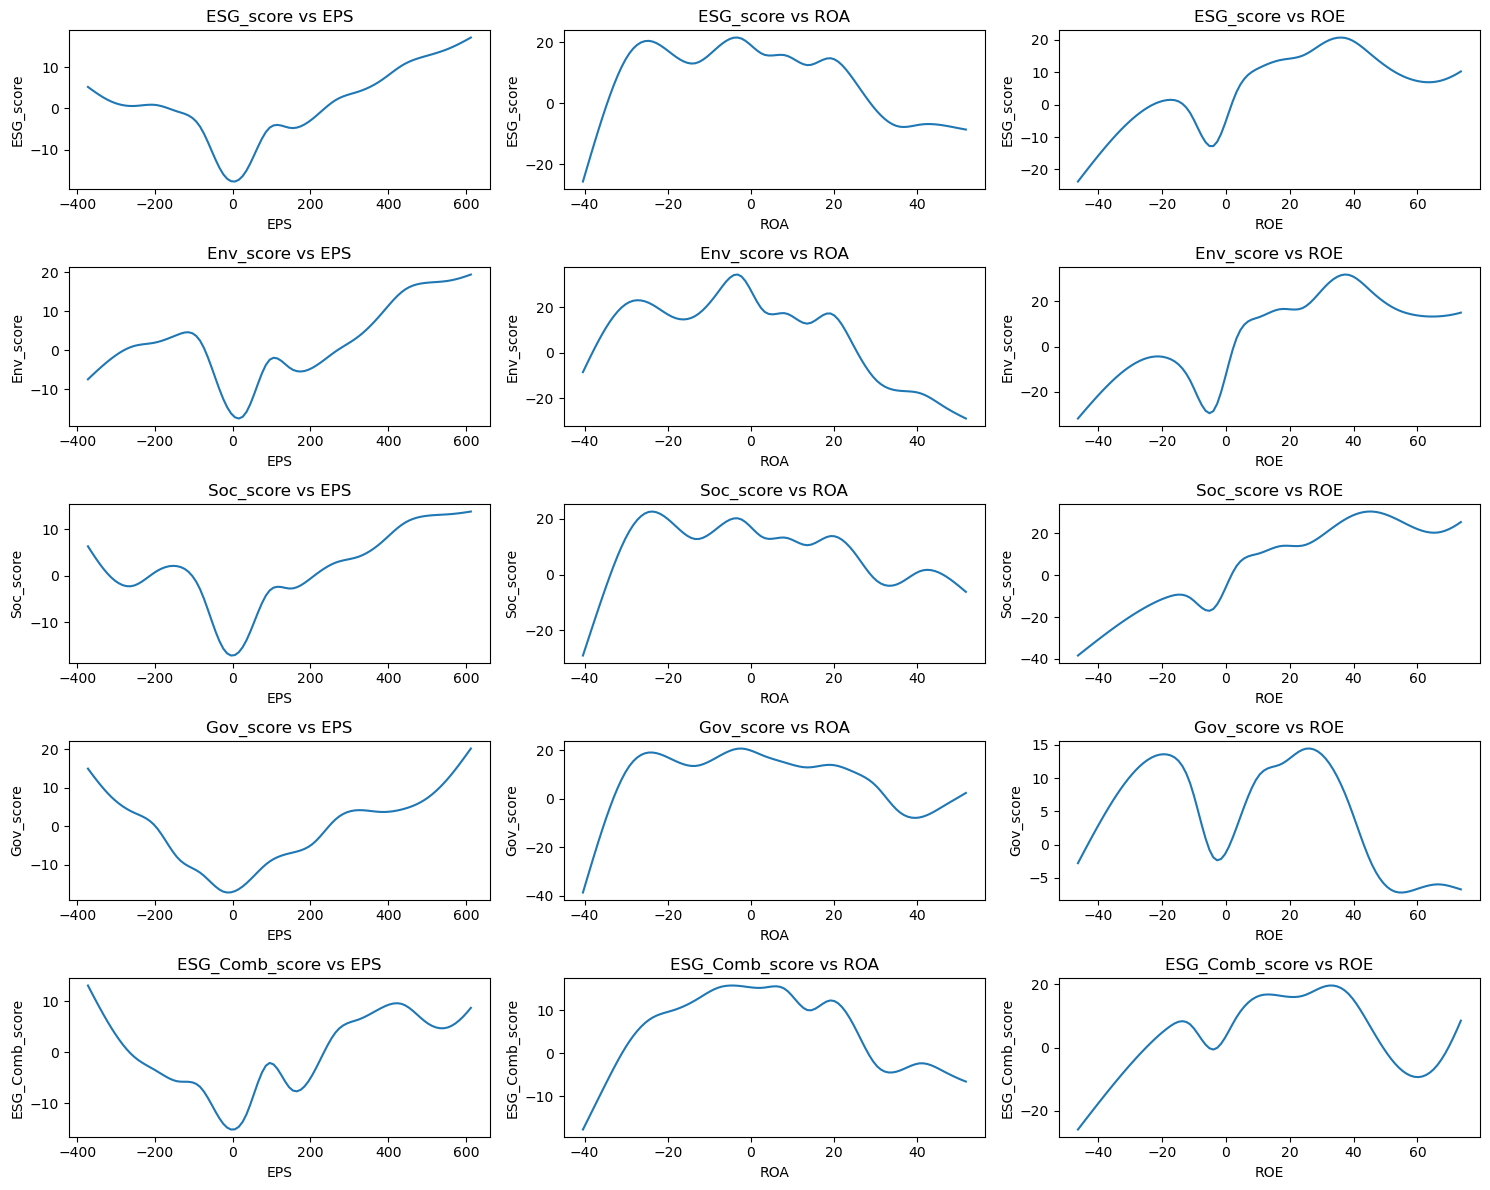

In [9]:
import pandas as pd
from pygam import LinearGAM, s
import matplotlib.pyplot as plt

# Assuming df_clean and X are defined as before

df_clean = df.dropna(subset=['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score', 'EPS', 'ROA', 'ROE'])
X = df_clean[['ROE', 'ROA', 'EPS']].values

results = {}
features = ['EPS', 'ROA', 'ROE']
targets = ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']

plt.figure(figsize=(15, 12))  # Make it big enough for all plots

for row_idx, target in enumerate(targets):
    y = df_clean[target].values
    
    gam = LinearGAM(s(0) + s(1) + s(2)).fit(X, y)
    results[target] = gam
    
    for col_idx, feature in enumerate(features):
        plt.subplot(len(targets), len(features), row_idx * len(features) + col_idx + 1)
        XX = gam.generate_X_grid(term=col_idx)
        pdp = gam.partial_dependence(term=col_idx, X=XX)
        plt.plot(XX[:, col_idx], pdp)
        plt.title(f'{target} vs {feature}')
        plt.xlabel(feature)
        plt.ylabel(target)

plt.tight_layout()
plt.savefig('GAM_all_ESG_USA.pdf')
plt.show()

In [11]:
import numpy as np
import pandas as pd
from pygam import LinearGAM, s
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Clean your data
df_clean = df.dropna(subset=['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score', 'EPS', 'ROA', 'ROE'])
X = df_clean[['EPS', 'ROA', 'ROE']].values

# Store polynomial coefficients
polynomials = {}

# Loop over each financial ratio
for target in ['ESG_score', 'Env_score', 'Soc_score', 'Gov_score', 'ESG_Comb_score']:
    y = df_clean[target].values
    gam = LinearGAM(s(0) + s(1) + s(2)).fit(X, y)

    feature_names = ['EPS', 'ROA', 'ROE']
    poly_dict = {}

    for i, feature in enumerate(feature_names):
        grid = gam.generate_X_grid(term=i)
        f_vals = gam.partial_dependence(term=i, X=grid).flatten()
        x_vals = grid[:, i]

        # Fit a degree-3 polynomial (cubic) to the smooth function
        p = Polynomial.fit(x_vals, f_vals, deg=3)
        poly_dict[feature] = p.convert().coef  # Convert to power basis (standard polynomial form)

    polynomials[target] = poly_dict

In [13]:
polynomials['ESG_score']

{'EPS': array([ 4.65459840e+00,  4.62905809e-01, -2.48478584e-03, -5.50610688e-05]),
 'ROA': array([ 1.98027006e+01, -3.59323882e-01, -1.83776402e-02,  2.82186697e-04]),
 'ROE': array([-7.86295018e+00,  6.31461033e-03,  1.10732072e-04, -8.31681711e-08])}

In [15]:
polynomials['Env_score']

{'EPS': array([-2.18363146e-02,  7.82751866e-01,  1.33575769e-03, -1.47760580e-04]),
 'ROA': array([ 2.29071114e+01, -4.67482271e-01, -1.99049097e-02,  1.65426793e-04]),
 'ROE': array([-4.68361312e+00,  1.18837158e-04,  5.64057126e-05,  4.17748038e-08])}

In [17]:
polynomials['Soc_score']

{'EPS': array([-3.28271657e-01,  8.09116541e-01, -1.31443866e-03, -8.18106173e-05]),
 'ROA': array([ 1.89522375e+01, -3.83637278e-01, -1.73607195e-02,  3.46661389e-04]),
 'ROE': array([-6.54860837e+00,  1.03532238e-02,  9.74298021e-05, -8.84607338e-08])}

In [19]:
polynomials['Gov_score']

{'EPS': array([ 9.96874435e+00, -7.69259300e-03, -3.89117809e-03,  1.21245291e-06]),
 'ROA': array([ 2.07444486e+01, -3.38630126e-01, -2.10872851e-02,  3.75220727e-04]),
 'ROE': array([-1.16836933e+01,  3.02541444e-03,  1.64272402e-04, -1.61535935e-07])}

In [21]:
polynomials['ESG_Comb_score']

{'EPS': array([ 1.19740110e+01,  2.85830770e-01, -9.97009998e-03,  3.15703153e-05]),
 'ROA': array([ 1.54255193e+01, -1.59460924e-01, -1.58556792e-02,  2.06060409e-04]),
 'ROE': array([-9.19054236e+00,  1.87712109e-02,  1.42516737e-04, -2.21119531e-07])}

In [23]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Create a DataFrame to store the results
evaluation_df = pd.DataFrame(columns=['Target', 'R2 Score', 'MSE', 'MAE'])

# Evaluate each model
for target in targets:
    y_true = df_clean[target].values
    y_pred = results[target].predict(X)
    
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    
    evaluation_df = pd.concat([
        evaluation_df,
        pd.DataFrame({
            'Target': [target],
            'R2 Score': [r2],
            'MSE': [mse],
            'MAE': [mae]
        })
    ], ignore_index=True)

# Display evaluation results
print(evaluation_df)

           Target  R2 Score          MSE        MAE
0       ESG_score -1.165556   798.911705  18.212389
1       Env_score -0.757079  1358.707314  25.574144
2       Soc_score -1.982840  1323.459794  21.208128
3       Gov_score -0.435272   630.184679  18.984788
4  ESG_Comb_score -8.957195  3257.556359  21.279956


C:\Users\fbergsma1\AppData\Local\Temp\ipykernel_10472\3278948464.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  evaluation_df = pd.concat([
